In [1]:
import pandas as pd

iris = pd.read_csv('../data/iris.csv')
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


### 7.1
Проанализируйте тепловую карту корреляций и ответьте на вопрос. Какие пары признаков датасета имеют сильную или очень сильную связь

<Axes: >

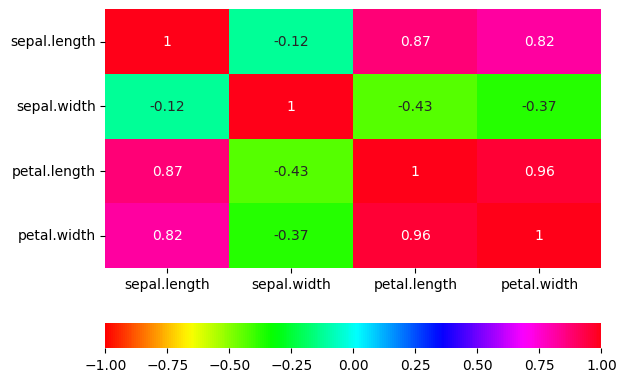

In [3]:
import seaborn as sns

temp=iris.corr(numeric_only=True).round(2)
sns.heatmap(temp, # df
            annot=True, # вывод надписей (подписать фон)
            vmin=-1, vmax=1, center= 0,# граници тепловой шкалы
            cmap= 'hsv',    # палитра цветов  https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html
            # linewidths=3, linecolor='black', # толщина и цвет оконтовки ячеек
            cbar_kws= {'orientation': 'horizontal'},
)

<Axes: >

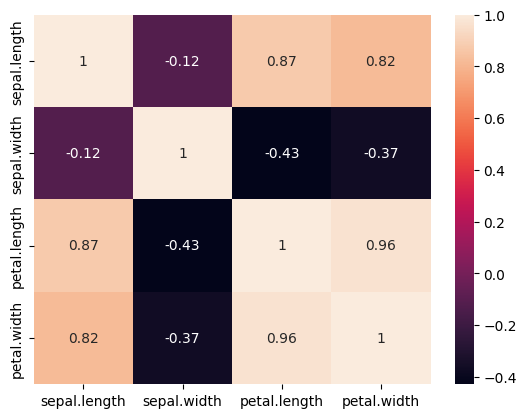

In [4]:
# отсеиваем числовые признаки и включаем отображение коэффициентов
sns.heatmap(iris.corr(numeric_only=True), annot=True)

In [5]:
iris = iris.drop(['petal.width'], axis=1)

In [6]:
iris = iris.drop(['petal.length'], axis=1)

In [7]:
iris

,sepal.length,sepal.width,variety
0,5.1,3.5,Setosa
1,4.9,3.0,Setosa
2,4.7,3.2,Setosa
3,4.6,3.1,Setosa
4,5.0,3.6,Setosa
...,...,...,...
145,6.7,3.0,Virginica
146,6.3,2.5,Virginica
147,6.5,3.0,Virginica
148,6.2,3.4,Virginica


### 7.3
Какие из признаков имеют самую сильную корреляционную связь

In [17]:
data = pd.read_csv('../data/wine_cleared.csv')

In [18]:
import category_encoders as ce
# для удобства сразу преобразуем признак в int
data['price_round'] = data['price'].round().astype(int)
regex = '\d{4}' # регулярное выражение для нахождения чисел
data['year'] = data['title'].str.findall(regex).str.get(0)
data['is_usa'] = data['country'].apply(lambda x: 1 if x == 'US' else 0)
data['is_france'] = data['country'].apply(lambda x: 1 if x == 'France' else 0)
data['is_italy'] = data['country'].apply(lambda x: 1 if x == 'Italy' else 0)
data['year']=data['year'].astype('Int64')
# year_d=data['year'].fillna(3000)
# data['old_wine'] = year_d.apply(lambda x: 1 if x <2010 else 0)
regex = '\((.*?)\)' # регулярное выражение для нахождения чисел
data['locality'] = data['title'].str.findall(regex).str.get(0)

encoder = ce.OneHotEncoder(cols=['taster_name'], use_cat_names=True) # указываем столбец для кодирования
type_bin = encoder.fit_transform(data['taster_name'])
data = pd.concat([data, type_bin], axis=1)

bin_encoder = ce.BinaryEncoder(cols=['country']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(data['country'])
data_1 = pd.concat([data, type_bin], axis=1)

bin_encoder = ce.BinaryEncoder(cols=['taster_twitter_handle']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(data_1['taster_twitter_handle'])
data_1 = pd.concat([data_1, type_bin], axis=1)

In [11]:
data.head(2)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,taster_name_Jim Gordon,taster_name_Joe Czerwinski,taster_name_Anne Krebiehl MW,taster_name_Lauren Buzzeo,taster_name_Mike DeSimone,taster_name_Jeff Jenssen,taster_name_Susan Kostrzewa,taster_name_Carrie Dykes,taster_name_Fiona Adams,taster_name_Christina Pickard
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,0,0,0,0,0,0,0,0,0,0
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

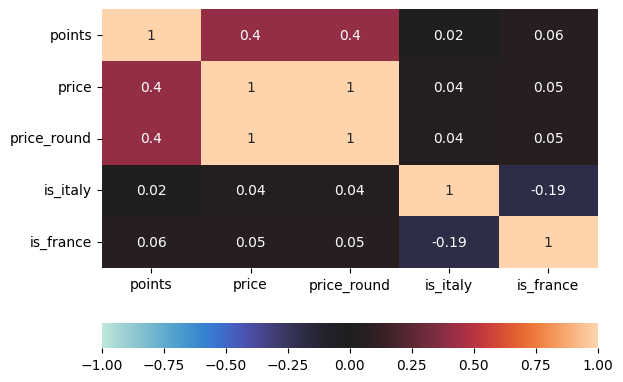

In [13]:
list_type=['points','price','price_round','is_italy','is_france']
temp=data[list_type].corr(numeric_only=True).round(2)
sns.heatmap(temp, # df
            annot=True, # вывод надписей (подписать фон)
            vmin=-1, vmax=1, center= 0,# граници тепловой шкалы
            # cmap= 'hsv',    # палитра цветов  https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html
            # linewidths=3, linecolor='black', # толщина и цвет оконтовки ячеек
            cbar_kws= {'orientation': 'horizontal'},
)

### 7.4
Проведите корреляционный анализ всего набора данных и отберите только необходимые признаки для предсказания рейтинга вина.

❗️ Удалять признак рейтинг — points нельзя!

❗️ Для простоты вычислений можете использовать только корреляцию Пирсона

<Axes: >

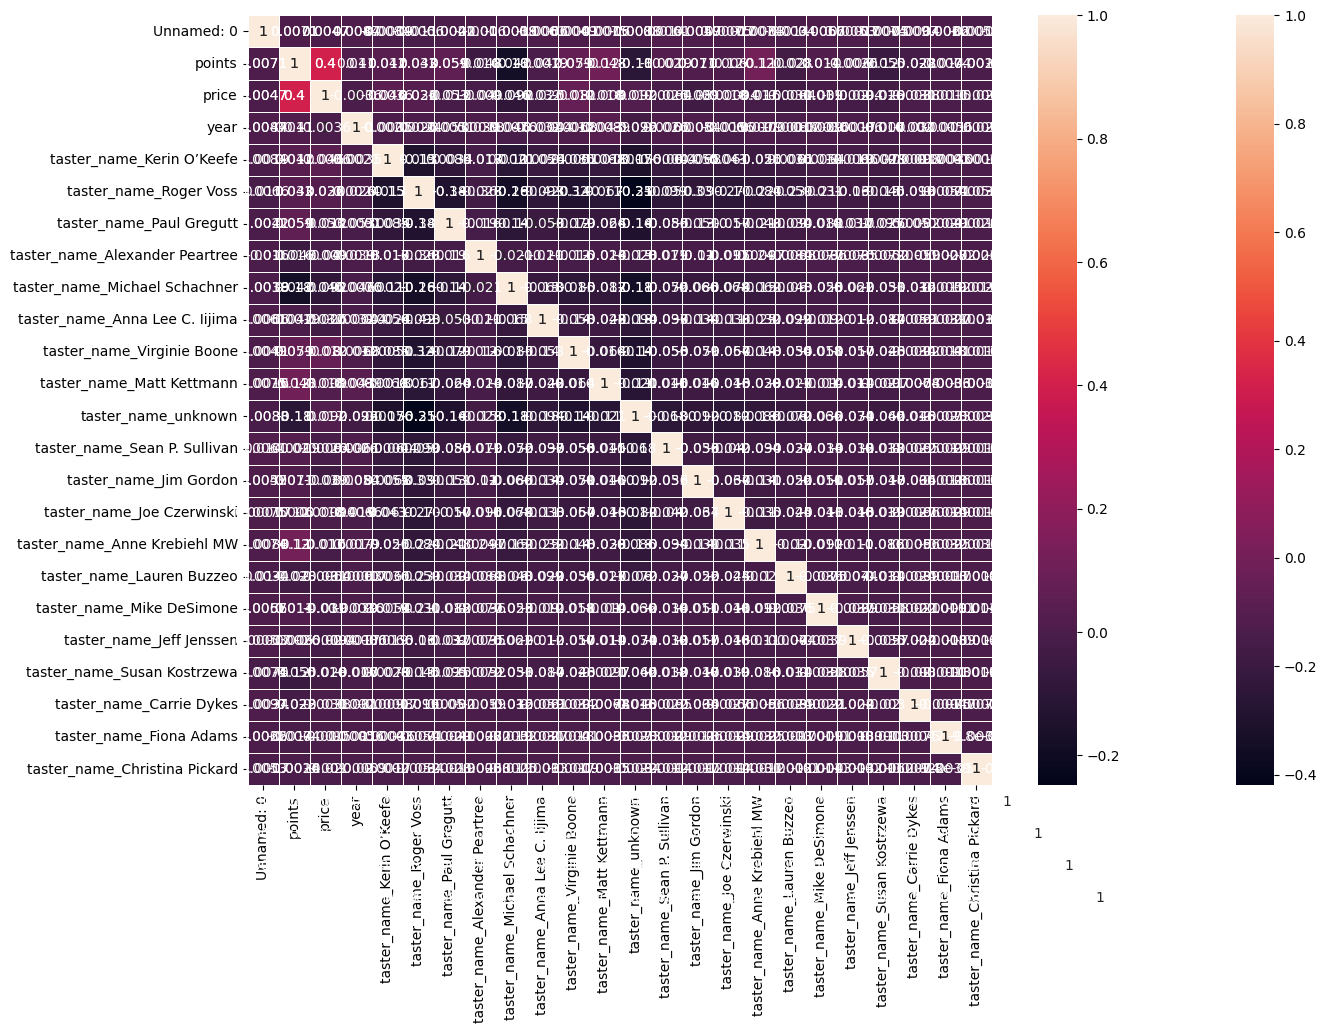

In [19]:
# Построим график корреляции всех величин. Для простоты воспользуемся корреляцией Пирсона.

# работа с визуализацией
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(numeric_only=True), annot=True, linewidths=.5, ax=ax)

# Удалим самые сильно скоррелированные пары
data = data.drop(['is_usa', 'is_france', 'is_italy', 'price_round'], axis=1)

# Проверяем, что сильно скоррелированных признаков не осталось
sns.heatmap(data.corr(numeric_only=True), annot=True, linewidths=.5, ax=ax)